<a href="https://colab.research.google.com/github/Micasaccone/Saccone-Micaela-Proyecto-Coder-2/blob/main/SACCONE_MICAELA_PROYECTO_DATA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis peliculas estrenadas entre 2010 - 2019**

Este proyecto tiene como objetivo desarrollar un modelo predictivo para estimar el ImbdRating de películas, utilizando un conjunto de datos que abarca películas estrenadas entre 2015 y 2019.

La variable objetivo, ImbdRating, se analizará en función de diversas características de las películas, incluyendo su género, país de producción, año de estreno, idioma y número de votos. A través de un análisis exploratorio de datos (EDA), se identificarán patrones y relaciones entre estas variables y el ImbdRating.

Posteriormente, se utilizarán técnicas de regresión para construir un modelo que permita predecir el rating de nuevas películas. Este estudio busca proporcionar una comprensión más profunda de los factores que influyen en la calificación de las películas y crear un modelo capaz de predecir las calificaciones futuras con base en características observables.

En el ámbito comercial, el ImbdRating no solo refleja el gusto del público, sino que también impacta en la rentabilidad y el éxito comercial de una película. Los estudios de cine, plataformas de streaming y productores independientes se benefician al poder predecir las calificaciones que una película podría recibir antes de su lanzamiento. Esto les permite optimizar estrategias de marketing, determinar presupuestos de producción más adecuados y hacer elecciones más informadas sobre qué proyectos financiar.

- Algunas preguntas a resolver:
1) ¿Cuáles géneros tienen un mayor ImbdRating promedio?
2) ¿Hay una relación entre el país productor y el ImbdRating?
3) ¿Existe una relación entre el año de estreno y el ImbdRating?
4) Las películas en inglés tienen una calificación promedio más alta que las de otros idiomas?
5) ¿Las películas con más votos tienden a tener una calificación más cercana a la media?

**Hipótesis**: Se plantea que las películas mejor calificadas son aquellas producidas en Estados Unidos, en idioma inglés, y que el género con mayor recaudación en taquilla es el de acción. Mediante un análisis detallado de los datos, se evaluará la validez de esta hipótesis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
  df = pd.read_excel('/content/movies2010.2019.xlsx')
  df.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,country,language,awards,lastupdated,type
0,146592,Pï¿½l Adrienn,2010,NaN,136 min,Drama,2015-05-06,ï¿½gnes Kocsis,"ï¿½gnes Kocsis (screenplay), Andrea Roberti (s...","ï¿½va Gï¿½bor, Istvï¿½n Znamenï¿½k, ï¿½kos Hor...",...,6.8,5309,https://m.media-amazon.com/images/M/MV5BMTk2Mz...,"A lonely obese nurse, working at a hospital te...","A lonely obese nurse, working at a hospital te...",USA,Hungarian,4 wins & 5 nominations.,00:00:29.400000,movie
1,326965,In My Sleep,2010,PG-13,104 min,Drama,2011-03-17,Allen Wolf,Allen Wolf,"Philip Winchester, Tim Draxl, Lacey Chabert, A...",...,5.5,2735,https://m.media-amazon.com/images/M/MV5BNzg1MD...,Marcus is a popular massage therapist who stru...,Marcus is a popular massage therapist who stru...,USA,English,6 wins.,00:37:59.600000,movie
2,374463,The Pacific,2010,TV-MA,52 min,Action,2013-02-12,NaN,NaN,"James Badge Dale, Joseph Mazzello, Jon Seda, S...",...,8.3,5329,https://m.media-amazon.com/images/M/MV5BNDY5NT...,The intertwined stories of three Marines durin...,The Pacific follows the lives of a U.S Marine ...,France,English,Nominated for 1 Golden Globe. Another 23 wins ...,00:04:50.100000,series
3,398286,Tangled,2010,PG,100 min,Animation,2014-04-26,"Nathan Greno, Byron Howard","Dan Fogelman (screenplay), Jacob Grimm (fairy ...","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",...,7.8,5201,https://m.media-amazon.com/images/M/MV5BMTAxND...,The magically long-haired Rapunzel has spent h...,After receiving the healing powers from a magi...,USA,English,Nominated for 1 Oscar. Another 8 wins & 38 nom...,00:05:18.900000,movie
4,403645,Utomlyonnye solntsem 2: Predstoyanie,2010,NaN,181 min,Drama,2012-04-13,Nikita Mikhalkov,"Nikita Mikhalkov, Vladimir Moiseenko, Aleksand...","Nikita Mikhalkov, Oleg Menshikov, Nadezhda Mik...",...,4.1,1829,https://m.media-amazon.com/images/M/MV5BMTQwMj...,"Epic film about WWII, a sequel to Burnt by the...","Epic film about WWII, a sequel to Burnt by the...",France,Russian,1 win & 2 nominations.,00:57:12.800000,movie


In [3]:
df.shape

(11183, 21)

**Definición de Variables**

- **imdbID** → Identificador único de la película en la base de datos de IMDb(Internet Movie Database).
- **title** → Título oficial de la película.
- **year** → Año en que se estrenó la película. En el trabajo lo identificamos como **"Años"**
* **rating** → Clasificación por edades (ej.: PG, R, 18+)
- **runtime** → Duración total de la película en minutos.
- **genre** → Género o géneros de la película (ej.: Acción, Drama, Comedia). En el trabajo lo identificamos como **"Género"**
- **released** → Fecha exacta de estreno de la película.
- **director** → Nombre del director o directora de la película.
- **writer** → Nombre del guionista o guionistas de la película.
- **cast** → Lista de actores y actrices principales.
- **metacritic** → Puntuación de la película en Metacritic (escala de 0 a 100).
- **imdbRating** → Puntuación promedio de la película en IMDb (escala de 1 a 10).
- **imdbVotes** → Número total de votos recibidos en IMDb.
- **poster** → URL de la imagen del póster de la película.
- **plot** → Resumen breve de la trama de la película.
- **fullplot** → Descripción detallada y completa de la trama.
- **language** → Idioma(s) original(es) en los que fue filmada la película. En el trabajo lo identificaremos como **"Lenguaje"**
- **country** → País o países donde se produjo la película. En el trabajo lo identificaremos como **"País"**
- **awards** → Premios ganados o nominaciones recibidas.
- **lastupdated** → Última fecha en que se actualizó la información de la película en la base de datos.
- **type** → Tipo de contenido (ej.: "movie" para películas, "series" para series, "documentary" para documentales).

# ***Proceso de limpieza de datos***

Vamos a analizar los datos nulos y realizar los correspondientes reemplazos o eliminación, también se realiza la verificación de valores duplicados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   imdbID       11183 non-null  int64         
 1   title        11183 non-null  object        
 2   year         11183 non-null  int64         
 3   rating       4263 non-null   object        
 4   runtime      9751 non-null   object        
 5   genre        11047 non-null  object        
 6   released     10217 non-null  datetime64[ns]
 7   director     11039 non-null  object        
 8   writer       10106 non-null  object        
 9   cast         10737 non-null  object        
 10  metacritic   3451 non-null   float64       
 11  imdbRating   10119 non-null  float64       
 12  imdbVotes    11183 non-null  int64         
 13  poster       8403 non-null   object        
 14  plot         10190 non-null  object        
 15  fullplot     9867 non-null   object        
 16  coun

**En el desarrollo del proyecto vamos a utilizar las variables categóricas: "Género", "País", "Lenguaje". Visualizamos que tienen muchas categorías, vamos a realizar un análisis para verificar si son necesarias todas o podemos trabajar con un "Top 10"**

In [5]:
for col in df.select_dtypes(include=['object', 'category']):
    print(f'{col}: {df[col].nunique()} categorias')


title: 10829 categorias
rating: 17 categorias
runtime: 215 categorias
genre: 25 categorias
director: 8272 categorias
writer: 9362 categorias
cast: 10481 categorias
poster: 8248 categorias
plot: 10008 categorias
fullplot: 9703 categorias
country: 60 categorias
language: 90 categorias
awards: 849 categorias
lastupdated: 9091 categorias
type: 2 categorias


In [6]:
top_10 = df['country'].value_counts().head(10)
total_registros = df['country'].count()
top_10_sum = top_10.sum()
porcentaje_top_10 = (top_10_sum / total_registros) * 100
print(f"El Top 10 de categorías representa el {porcentaje_top_10:.2f}% del total de categorías.")


El Top 10 de categorías representa el 93.54% del total de categorías.


In [7]:
top_10 = df['language'].value_counts().head(10)
total_registros = df['language'].count()
top_10_sum = top_10.sum()
porcentaje_top_10 = (top_10_sum / total_registros) * 100
print(f"El Top 10 de categorías representa el {porcentaje_top_10:.2f}% del total de categorías.")

El Top 10 de categorías representa el 87.39% del total de categorías.


In [8]:
top_10 = df['genre'].value_counts().head(10)
total_registros = df['genre'].count()
top_10_sum = top_10.sum()
porcentaje_top_10 = (top_10_sum / total_registros) * 100
print(f"El Top 10 de categorías representa el {porcentaje_top_10:.2f}% del total de categorías.")

El Top 10 de categorías representa el 95.22% del total de categorías.


**En este caso las tres variables representan mas del 80% del dataset, por lo cuál sería lógico reemplazar el resto de las categorías por "otros"**

In [9]:
top_10_categoria_1 = df['country'].value_counts().head(10).index
top_10_categoria_2 = df['language'].value_counts().head(10).index
top_10_categoria_3 = df['genre'].value_counts().head(10).index

df['country'] = df['country'].apply(lambda x: x if x in top_10_categoria_1 else 'otros')
df['language'] = df['language'].apply(lambda x: x if x in top_10_categoria_2 else 'otros')
df['genre'] = df['genre'].apply(lambda x: x if x in top_10_categoria_3 else 'otros')

df.head()


,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,country,language,awards,lastupdated,type
0,146592,Pï¿½l Adrienn,2010,NaN,136 min,Drama,2015-05-06,ï¿½gnes Kocsis,"ï¿½gnes Kocsis (screenplay), Andrea Roberti (s...","ï¿½va Gï¿½bor, Istvï¿½n Znamenï¿½k, ï¿½kos Hor...",...,6.8,5309,https://m.media-amazon.com/images/M/MV5BMTk2Mz...,"A lonely obese nurse, working at a hospital te...","A lonely obese nurse, working at a hospital te...",USA,otros,4 wins & 5 nominations.,00:00:29.400000,movie
1,326965,In My Sleep,2010,PG-13,104 min,Drama,2011-03-17,Allen Wolf,Allen Wolf,"Philip Winchester, Tim Draxl, Lacey Chabert, A...",...,5.5,2735,https://m.media-amazon.com/images/M/MV5BNzg1MD...,Marcus is a popular massage therapist who stru...,Marcus is a popular massage therapist who stru...,USA,English,6 wins.,00:37:59.600000,movie
2,374463,The Pacific,2010,TV-MA,52 min,Action,2013-02-12,NaN,NaN,"James Badge Dale, Joseph Mazzello, Jon Seda, S...",...,8.3,5329,https://m.media-amazon.com/images/M/MV5BNDY5NT...,The intertwined stories of three Marines durin...,The Pacific follows the lives of a U.S Marine ...,France,English,Nominated for 1 Golden Globe. Another 23 wins ...,00:04:50.100000,series
3,398286,Tangled,2010,PG,100 min,Animation,2014-04-26,"Nathan Greno, Byron Howard","Dan Fogelman (screenplay), Jacob Grimm (fairy ...","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",...,7.8,5201,https://m.media-amazon.com/images/M/MV5BMTAxND...,The magically long-haired Rapunzel has spent h...,After receiving the healing powers from a magi...,USA,English,Nominated for 1 Oscar. Another 8 wins & 38 nom...,00:05:18.900000,movie
4,403645,Utomlyonnye solntsem 2: Predstoyanie,2010,NaN,181 min,Drama,2012-04-13,Nikita Mikhalkov,"Nikita Mikhalkov, Vladimir Moiseenko, Aleksand...","Nikita Mikhalkov, Oleg Menshikov, Nadezhda Mik...",...,4.1,1829,https://m.media-amazon.com/images/M/MV5BMTQwMj...,"Epic film about WWII, a sequel to Burnt by the...","Epic film about WWII, a sequel to Burnt by the...",France,Russian,1 win & 2 nominations.,00:57:12.800000,movie


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
imdbID,11183.0,2434488.076634,69049.0,1696093.0,2200989.0,3120997.0,5016760.0,966521.979656
year,11183.0,2012.670661,2010.0,2011.0,2013.0,2014.0,2015.0,1.691088
released,10217,2013-04-16 06:14:54.274248704,2006-02-06 00:00:00,2011-11-23 00:00:00,2013-05-23 00:00:00,2014-09-26 00:00:00,2017-12-25 00:00:00,NaN
metacritic,3451.0,56.153868,1.0,44.0,57.0,69.0,100.0,17.436022
imdbRating,10119.0,6.259067,1.2,5.6,6.4,7.1,9.5,1.224776
imdbVotes,11183.0,3583.439417,1504.0,2534.0,3577.0,4632.5,5687.0,1205.774479


In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
title,11183,10829,Mad As Hell,5
rating,4263,17,R,1775
runtime,9751,215,90 min,689
genre,11183,11,Drama,2648
director,11039,8272,Jay Chapman,17
writer,10106,9362,Louis Theroux,9
cast,10737,10481,"Sï¿½ichirï¿½ Hoshi, Chiwa Saito, Hiroshi Kamiy...",5
poster,8403,8248,https://m.media-amazon.com/images/M/MV5BMjI2OT...,5
plot,10190,10008,"The Young Turks, one of the most popular onlin...",5
fullplot,9867,9703,"The Young Turks, one of the most popular onlin...",5


In [12]:
df.select_dtypes(include=['object']).apply(pd.unique)

,0
title,"[Pï¿½l Adrienn, In My Sleep, The Pacific, Tang..."
rating,"[nan, PG-13, TV-MA, PG, R, G, NOT RATED, UNRAT..."
runtime,"[136 min, 104 min, 52 min, 100 min, 181 min, 9..."
genre,"[Drama, Action, Animation, Comedy, Crime, Horr..."
director,"[ï¿½gnes Kocsis, Allen Wolf, nan, Nathan Greno..."
writer,"[ï¿½gnes Kocsis (screenplay), Andrea Roberti (..."
cast,"[ï¿½va Gï¿½bor, Istvï¿½n Znamenï¿½k, ï¿½kos Ho..."
poster,[https://m.media-amazon.com/images/M/MV5BMTk2M...
plot,"[A lonely obese nurse, working at a hospital t..."
fullplot,"[A lonely obese nurse, working at a hospital t..."


In [13]:
df.duplicated().sum()

0

**Observamos que en este dataset no hay datos duplicados**

In [14]:
nulos_por_variable = df.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum()
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0]
lista_variables_con_nulos = variables_con_nulos.index.tolist()
for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(df)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")

Variable: rating, Cantidad de Nulos: 6920, Porcentaje: 61.88%
Variable: runtime, Cantidad de Nulos: 1432, Porcentaje: 12.81%
Variable: released, Cantidad de Nulos: 966, Porcentaje: 8.64%
Variable: director, Cantidad de Nulos: 144, Porcentaje: 1.29%
Variable: writer, Cantidad de Nulos: 1077, Porcentaje: 9.63%
Variable: cast, Cantidad de Nulos: 446, Porcentaje: 3.99%
Variable: metacritic, Cantidad de Nulos: 7732, Porcentaje: 69.14%
Variable: imdbRating, Cantidad de Nulos: 1064, Porcentaje: 9.51%
Variable: poster, Cantidad de Nulos: 2780, Porcentaje: 24.86%
Variable: plot, Cantidad de Nulos: 993, Porcentaje: 8.88%
Variable: fullplot, Cantidad de Nulos: 1316, Porcentaje: 11.77%
Variable: awards, Cantidad de Nulos: 5538, Porcentaje: 49.52%
Variable: lastupdated, Cantidad de Nulos: 502, Porcentaje: 4.49%
Variable: type, Cantidad de Nulos: 529, Porcentaje: 4.73%


En base a los porcentajes de los valores nulos, concluimos lo siguiente:
- *Las siguientes variables serán eliminadas*: rating, metacritic, poster, awards. Se toma como referencia todas las que superen un 20%
- *Las siguientes variables serán reemplazadas por la media*: imdbRating
- *Las siguientes variales serán completadas con Nan en los valores nulos*:year, runtime, genre, relased, director, writer, cast, plot, fullplot, language, lasupdated, type

In [15]:
columnas_a_eliminar = ['rating', 'metacritic', 'poster', 'awards']
df = df.drop(columns=columnas_a_eliminar)


In [16]:
for col in ['imdbRating']:
    df[col] = df[col].fillna(df[col].mean())

In [17]:
columnas_con_nan = ['runtime', 'genre', 'released', 'director', 'writer', 'cast', 'plot', 'fullplot', 'language', 'type', 'lastupdated']
for col in columnas_con_nan:
    df[col] = df[col].fillna("NaN")

In [18]:
df.head()

,imdbID,title,year,runtime,genre,released,director,writer,cast,imdbRating,imdbVotes,plot,fullplot,country,language,lastupdated,type
0,146592,Pï¿½l Adrienn,2010,136 min,Drama,2015-05-06,ï¿½gnes Kocsis,"ï¿½gnes Kocsis (screenplay), Andrea Roberti (s...","ï¿½va Gï¿½bor, Istvï¿½n Znamenï¿½k, ï¿½kos Hor...",6.8,5309,"A lonely obese nurse, working at a hospital te...","A lonely obese nurse, working at a hospital te...",USA,otros,00:00:29.400000,movie
1,326965,In My Sleep,2010,104 min,Drama,2011-03-17,Allen Wolf,Allen Wolf,"Philip Winchester, Tim Draxl, Lacey Chabert, A...",5.5,2735,Marcus is a popular massage therapist who stru...,Marcus is a popular massage therapist who stru...,USA,English,00:37:59.600000,movie
2,374463,The Pacific,2010,52 min,Action,2013-02-12,NaN,NaN,"James Badge Dale, Joseph Mazzello, Jon Seda, S...",8.3,5329,The intertwined stories of three Marines durin...,The Pacific follows the lives of a U.S Marine ...,France,English,00:04:50.100000,series
3,398286,Tangled,2010,100 min,Animation,2014-04-26,"Nathan Greno, Byron Howard","Dan Fogelman (screenplay), Jacob Grimm (fairy ...","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",7.8,5201,The magically long-haired Rapunzel has spent h...,After receiving the healing powers from a magi...,USA,English,00:05:18.900000,movie
4,403645,Utomlyonnye solntsem 2: Predstoyanie,2010,181 min,Drama,2012-04-13,Nikita Mikhalkov,"Nikita Mikhalkov, Vladimir Moiseenko, Aleksand...","Nikita Mikhalkov, Oleg Menshikov, Nadezhda Mik...",4.1,1829,"Epic film about WWII, a sequel to Burnt by the...","Epic film about WWII, a sequel to Burnt by the...",France,Russian,00:57:12.800000,movie


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   imdbID       11183 non-null  int64         
 1   title        11183 non-null  object        
 2   year         11183 non-null  int64         
 3   runtime      11183 non-null  object        
 4   genre        11183 non-null  object        
 5   released     10217 non-null  datetime64[ns]
 6   director     11183 non-null  object        
 7   writer       11183 non-null  object        
 8   cast         11183 non-null  object        
 9   imdbRating   11183 non-null  float64       
 10  imdbVotes    11183 non-null  int64         
 11  plot         11183 non-null  object        
 12  fullplot     11183 non-null  object        
 13  country      11183 non-null  object        
 14  language     11183 non-null  object        
 15  lastupdated  11183 non-null  object        
 16  type

In [20]:
df.shape

(11183, 17)

# **Análisis univariado con gráficos**

1- Vamos a detectar el año con mayor cantidad de películas

2- Vamos a identificar el género más repetido

3- Buscar outliers

4- Vamos a observar la forma de distribución

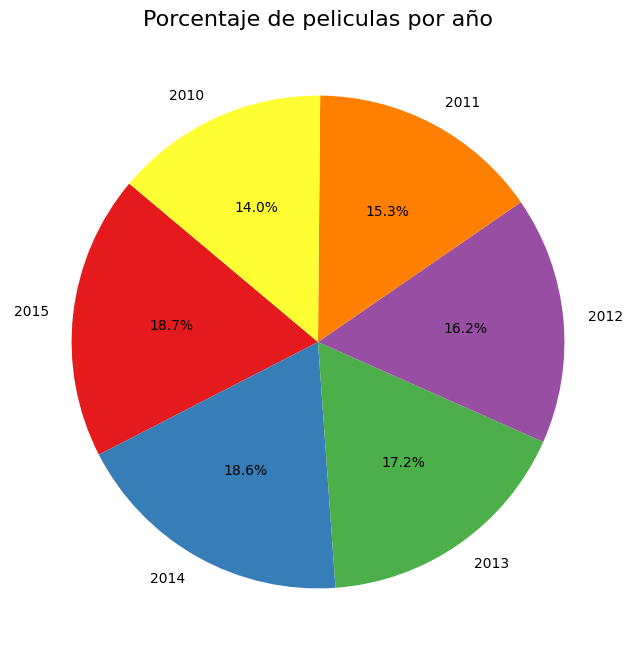

In [21]:
year_counts = df['year'].value_counts()
year_labels = year_counts.index
year_sizes = year_counts.values

plt.figure(figsize=(8, 8))
plt.pie(year_sizes, labels=year_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
plt.title('Porcentaje de peliculas por año', fontsize=16)
plt.show()

Podemos concluir que si bien se encuentra bastente distribuido en todos los años, en los últimos 3 años se generaron más cantidad de las  mismas.
Si visualizamos el gráfico de tortas con porcentajes, podemos concluir que se encuentra muy bien distribuída la cantidad entre años.  

<ipython-input-22-8a0b9d466f4c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Género', fontsize=12)


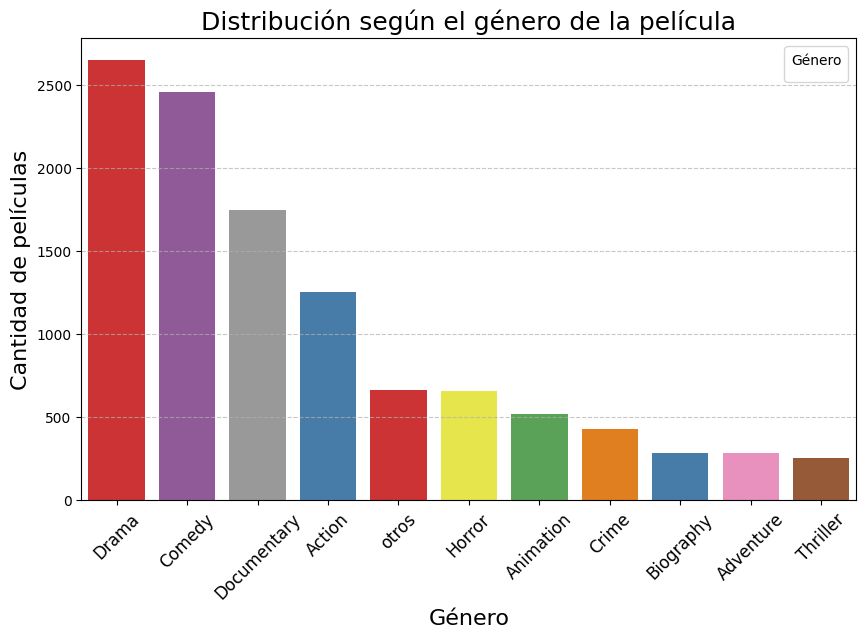

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='Set1', hue='genre')
plt.title('Distribución según el género de la película', fontsize=18)
plt.xlabel('Género', fontsize=16)
plt.ylabel('Cantidad de películas', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Género', fontsize=12)
plt.show()

Podemos identificar que los géneros predominantes son "Drama", "Comedia", "Documental" y "Acción". La quinta categoría es "Otros", teniendo mayor relevancia que los otros géneros. Queda claro en el gráfico que las primeras 4 categorías abarcan casi todo el dataset.

<ipython-input-23-04c23ea99041>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='País', fontsize=12)


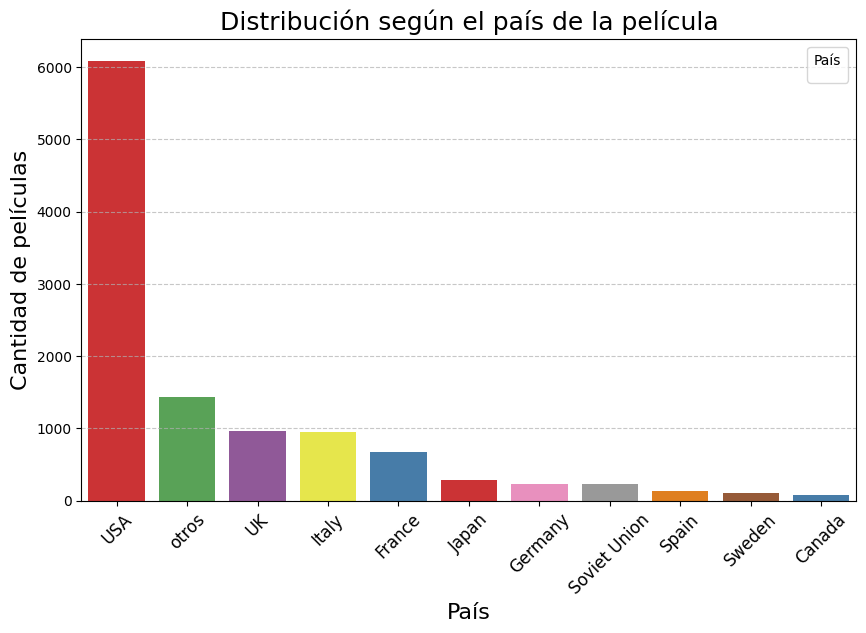

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index, palette='Set1', hue='country')
plt.title('Distribución según el país de la película', fontsize=18)
plt.xlabel('País', fontsize=16)
plt.ylabel('Cantidad de películas', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='País', fontsize=12)
plt.show()

Podemos analizar que el país predomintante es USA (Estados Unidos), siendo la segunda categoría "Otros". También podemos observar que la primer categoría abarca casi por completo el dataset.

<ipython-input-24-d15b17173678>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Lenguaje', fontsize=12)


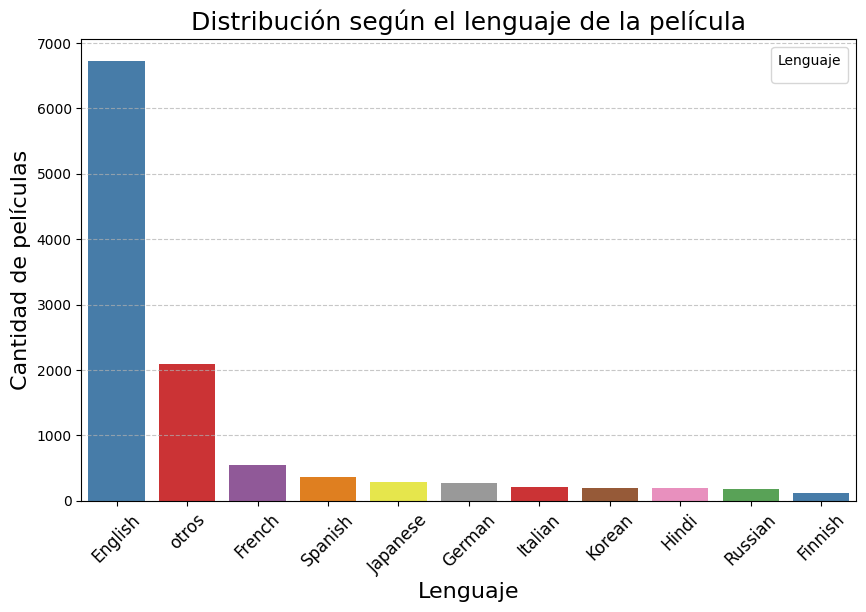

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='language', order=df['language'].value_counts().index, palette='Set1', hue='language')
plt.title('Distribución según el lenguaje de la película', fontsize=18)
plt.xlabel('Lenguaje', fontsize=16)
plt.ylabel('Cantidad de películas', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Lenguaje', fontsize=12)
plt.show()

Al igual que con País, existe una gran relevancia de la primera categoría, siendo "otros" la de segunda importancia.

Media de imdbRating: 6.259067101492244
Mediana de imdbRating: 6.3
Moda de imdbRating: 6.259067101492242


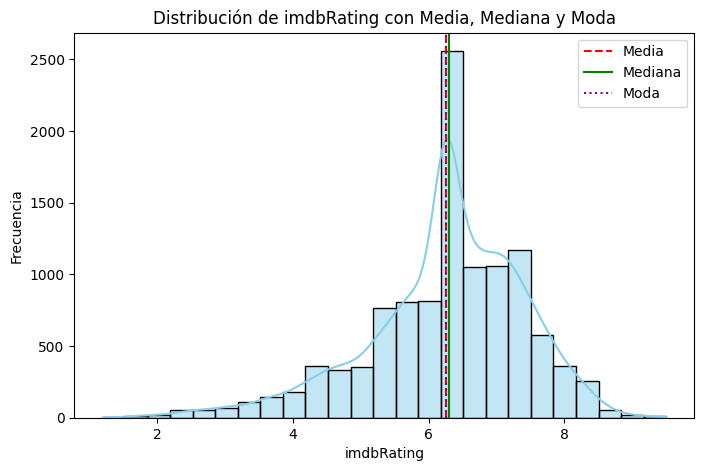

In [25]:
media_imdbRating = df['imdbRating'].mean()
mediana_imdbRating= df['imdbRating'].median()
moda_imdbRating = df['imdbRating'].mode()[0]

print("Media de imdbRating:", media_imdbRating)
print("Mediana de imdbRating:", mediana_imdbRating)
print("Moda de imdbRating:", moda_imdbRating)
plt.figure(figsize=(8, 5))
sns.histplot(df['imdbRating'], kde=True, color='skyblue', bins=25)
plt.axvline(media_imdbRating, color='red', linestyle='--', label='Media')
plt.axvline(mediana_imdbRating, color='green', linestyle='-', label='Mediana')
plt.axvline(moda_imdbRating, color='purple', linestyle=':', label='Moda')
plt.xlabel('imdbRating')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de imdbRating con Media, Mediana y Moda')
plt.show()

Dado que la media y la mediana son bastante cercanas (solo hay una diferencia de 0.04), podemos concluir que la distribución de ImbdRating es relativamente simétrica. Como la media y la mediana no están demasiado distantes, no parece haber una asimetría extrema (ni sesgo a la derecha ni a la izquierda).

In [26]:
z_scores = stats.zscore(df['imdbRating'])
umbral = 3
outliers = np.abs(z_scores) > umbral
outliers_df = df[outliers]
print(f"Cantidad de outliers detectados: {outliers_df.shape[0]}")


Cantidad de outliers detectados: 113


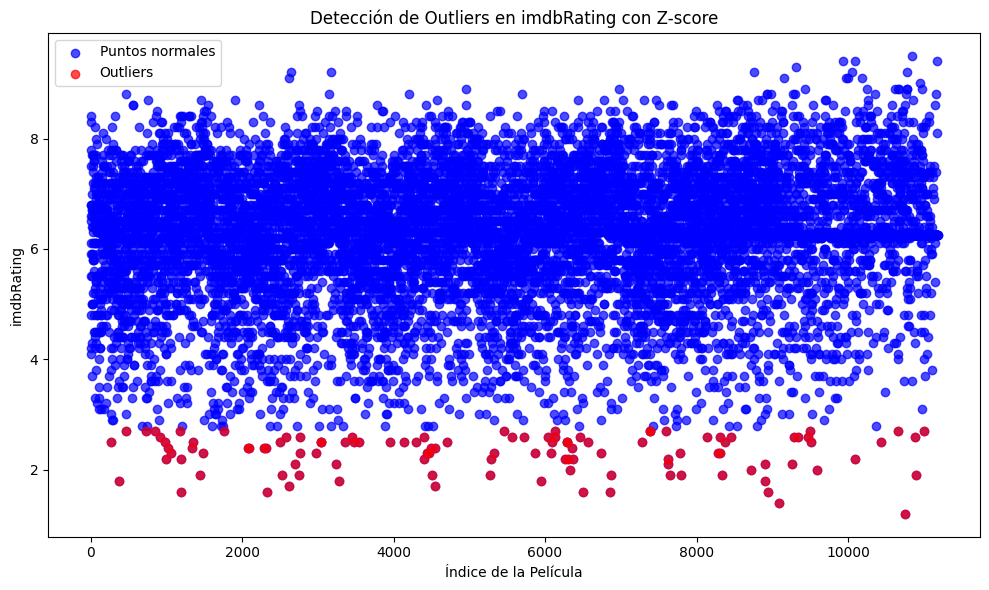

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['imdbRating'], label='Puntos normales', color='blue', alpha=0.7)
plt.scatter(df.index[outliers], df['imdbRating'][outliers], color='red', label='Outliers', alpha=0.7)
plt.title('Detección de Outliers en imdbRating con Z-score')
plt.xlabel('Índice de la Película')
plt.ylabel('imdbRating')
plt.legend()
plt.tight_layout()
plt.show()

Podemos detectar que hay algunos valores outliers, pero no vamos a eliminarlos ya que nos sirven para el análisis del caso, por un lado no son datos que se vayan tan al extremo y aparte van a ayudar a determinar el modelo.

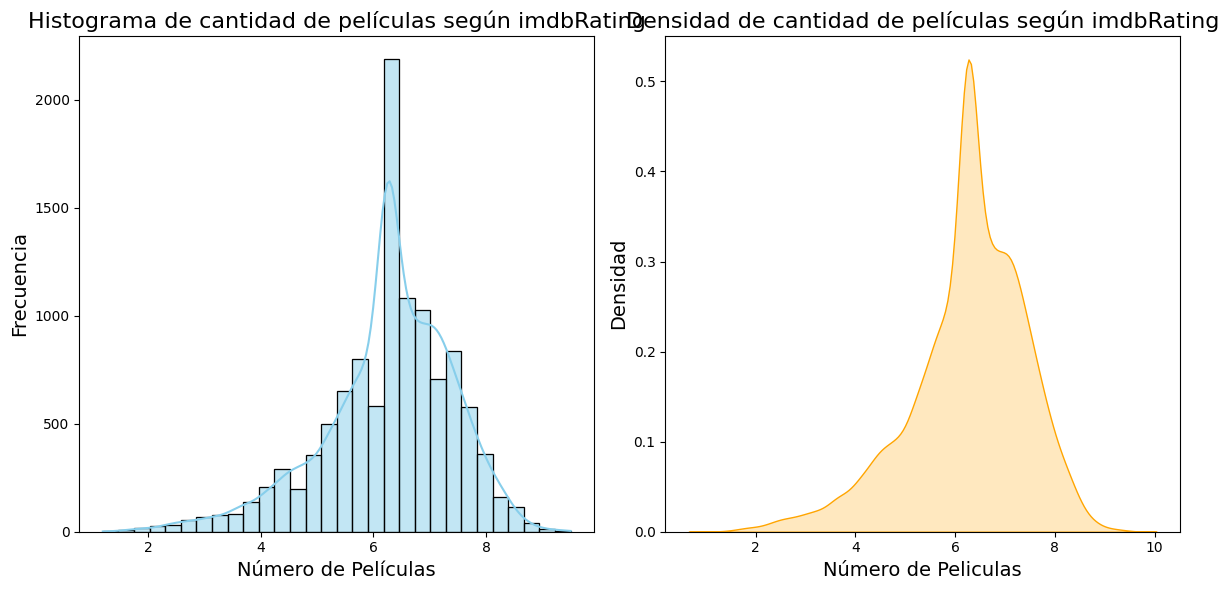

Simetría: -0.76
Curtosis: 1.00


In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['imdbRating'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de cantidad de películas según imdbRating', fontsize=16)
plt.xlabel('Número de Películas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.subplot(1, 2, 2)
sns.kdeplot(df['imdbRating'], fill=True, color='orange')
plt.title('Densidad de cantidad de películas según imdbRating', fontsize=16)
plt.xlabel('Número de Peliculas', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

plt.tight_layout()
plt.show()

skewness = df['imdbRating'].skew()
kurtosis = df['imdbRating'].kurtosis()

print(f"Simetría: {skewness:.2f}")
print(f"Curtosis: {kurtosis:.2f}")

 **Simetría**: es negativa, lo que indica que los datos están ligeramente sesgados hacia la izquierda.
 **Cuartosis**: una distribución con colas ligeras, es decir, los valores extremos son menos frecuentes. En este caso, la distribución tiene un comportamiento más cercano a una distribución normal
 Los datos presentan una distribución con menos valores extremos, más parecida a una distribución normal, aunque no exacta.

# **Análisis Bivariado con gráficos**

Vamos a realizar análisis de diferentes variables para poder medir la correlación.
 - Analizaremos la relación de los géneros con ImbdRating
 - Analizaremos la relación de ImbdVotes con ImbdRating
 - Analizaremos la relación de años con ImbdRating
 - Analizaremos la relación de lenguaje con ImbdRating
 - Analizaremos la relación de país con ImbdRating
 - Analizaremos la correlación entre nuestras variables numéricas y categóricas



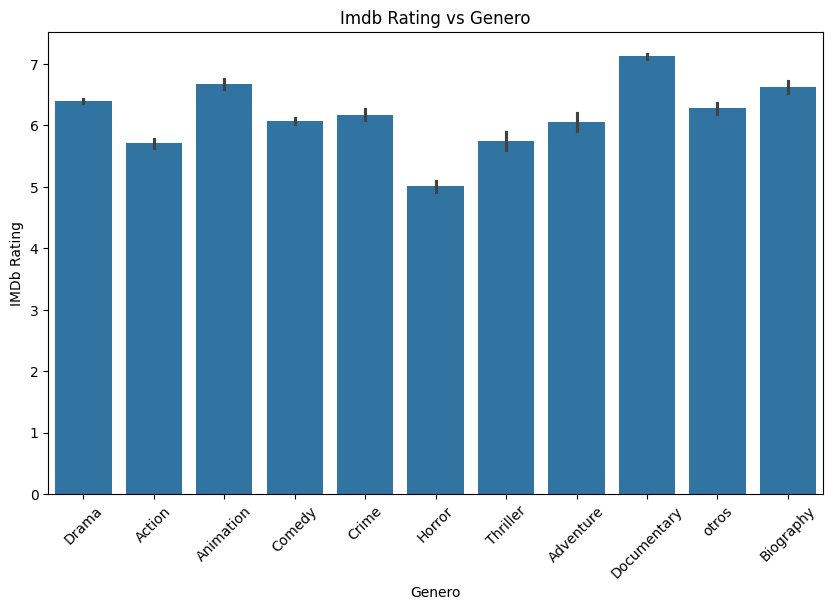

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='imdbRating', data=df)
plt.title('Imdb Rating vs Genero')
plt.xlabel('Genero')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()


Podemos determinar que el género con mayor cantidad de puntos es "Documentary", mientras que el género menos votado es "Horror".

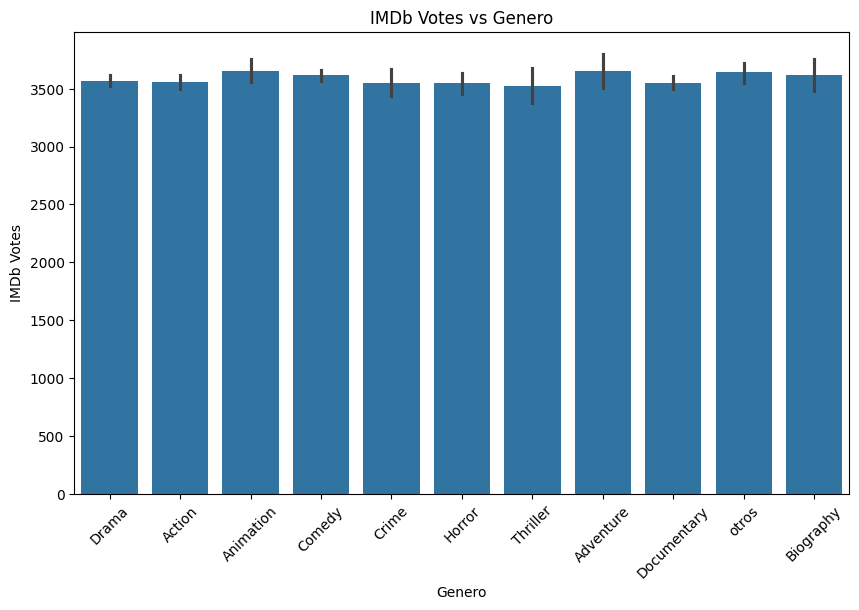

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='imdbVotes', data=df)
plt.title('IMDb Votes vs Genero')
plt.xlabel('Genero')
plt.ylabel('IMDb Votes')
plt.xticks(rotation=45)
plt.show()


Analizando los últimos dos gráficos en conjunto podemos determinar que se encuentra bien distribuida la canitdad de votos por género, por lo cuál se puede concluir que es representativo del dataset en general el Imbdrating.

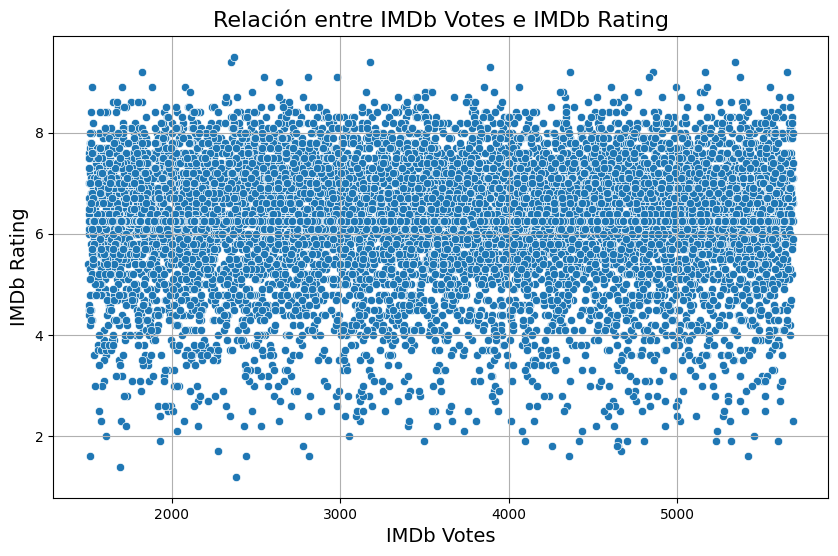

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdbVotes', y='imdbRating', data=df)
plt.title('Relación entre IMDb Votes e IMDb Rating', fontsize=16)
plt.xlabel('IMDb Votes', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.grid(True)
plt.show()


Podemos determinar que se encuentran casi todos los datos distribuidos entre el 4 y 8, no habiendo a simple vista valores outliers.

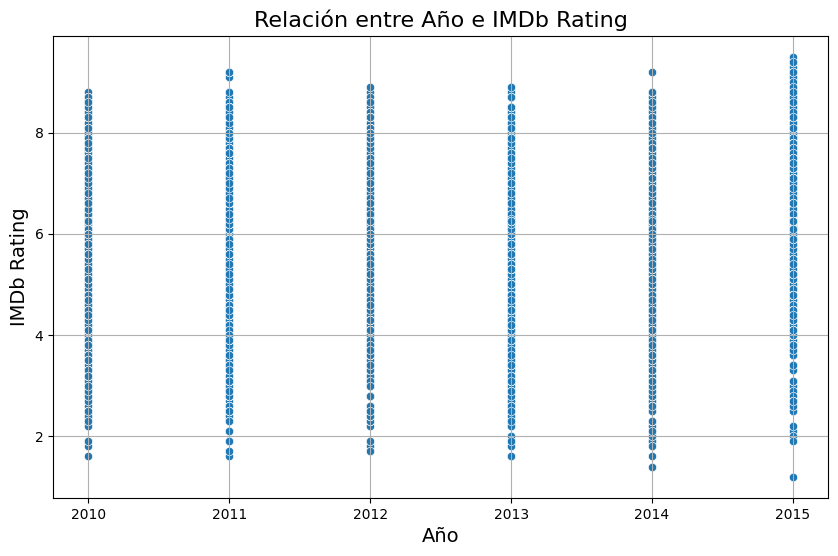

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='imdbRating', data=df)
plt.title('Relación entre Año e IMDb Rating', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.grid(True)
plt.show()


Podemos determinar que se encuentra muy bien ditribuido el rating según el año, exitiendo un poco mas de distribución entre valores extremos el año 2011 y 2015, pero no representan valores muy por fuera de la norma, salvo en 2015 que hay un valor muy por debajo, pero tambien es donde se encuentran los valores más elevados

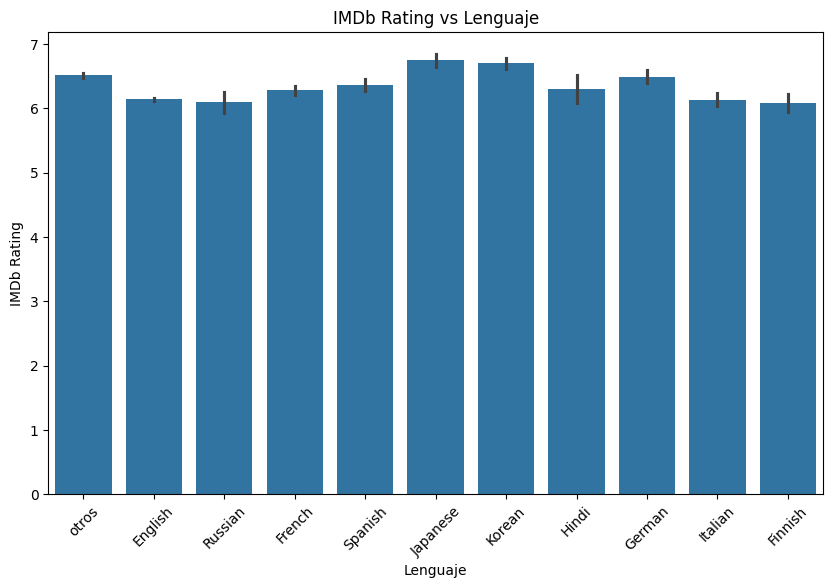

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='language', y='imdbRating', data=df)
plt.title('IMDb Rating vs Lenguaje')
plt.xlabel('Lenguaje')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()


El idioma "Japones" y "koreano" se encuentran por encima de los valores generales, podemos determinar que hay una mejor calificación hacia estos lenguajes

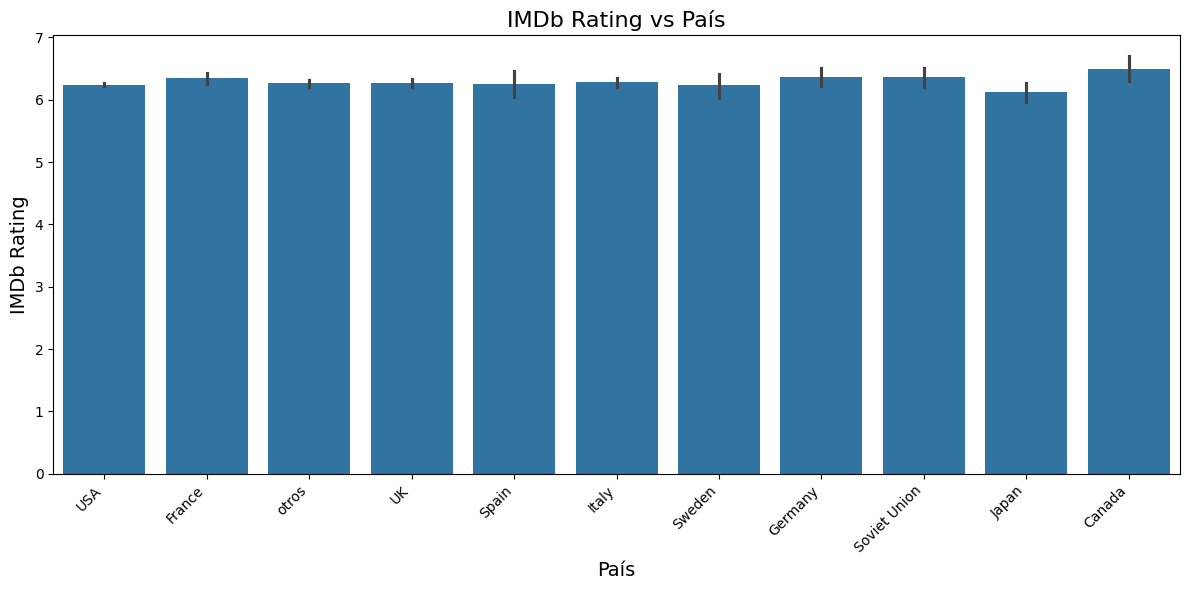

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='imdbRating', data=df)
plt.title('IMDb Rating vs País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Podemos visualizar que se encuentra muy bien distribuído el ImbdRating según el país

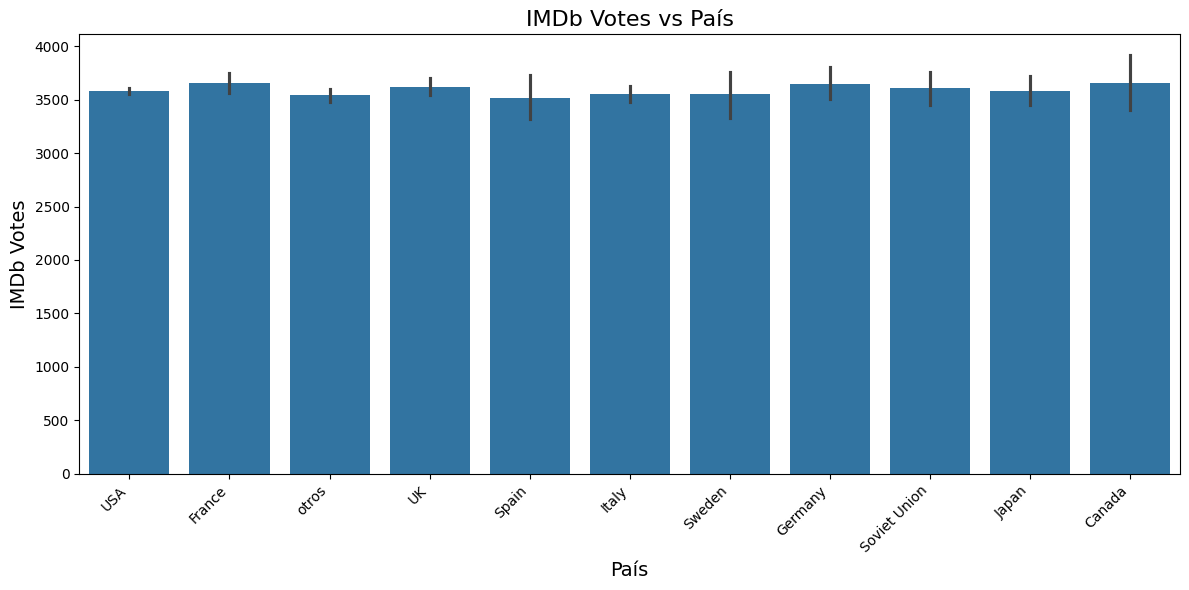

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='imdbVotes', data=df)
plt.title('IMDb Votes vs País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('IMDb Votes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Si comparamos ambos gráficos podemos determinar también todos los países reciberon aproximadamente la misma cantidad de votos.

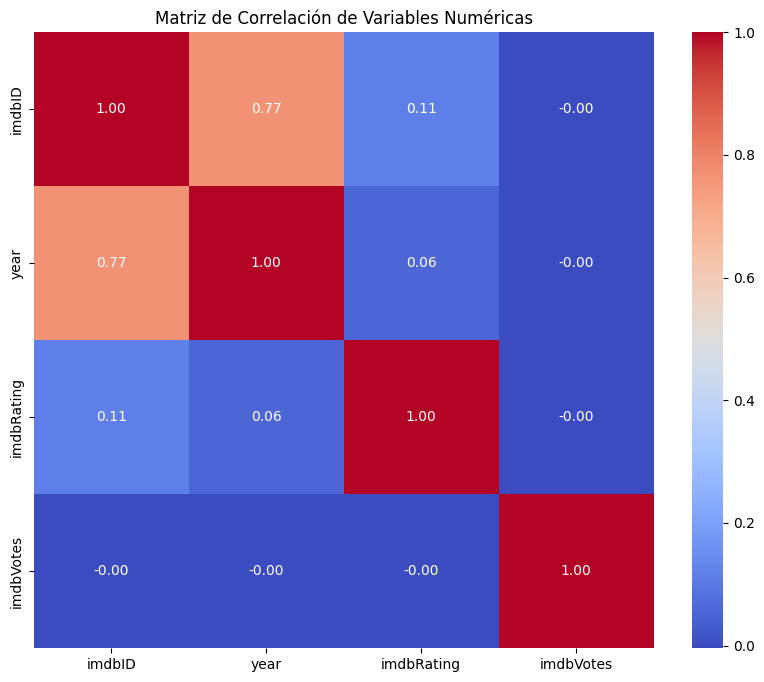

In [36]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

La matriz de correlación lamentablemente demuestra que no existe una buena correlación entre nuestras variables numéricas

In [37]:
categorical_cols = ['genre', 'country', 'language']

from scipy.stats import chi2_contingency

for i in range(len(categorical_cols)):
  for j in range(i + 1, len(categorical_cols)):
    contingency_table = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Correlación entre {categorical_cols[i]} y {categorical_cols[j]}:")
    print(f"Chi-cuadrado = {chi2}, p-valor = {p}")
    if p < 0.05:
        print("Existe una correlación significativa entre las dos variables.")
    else:
        print("No existe una correlación significativa entre las dos variables.")


Correlación entre genre y country:
Chi-cuadrado = 123.40966708128735, p-valor = 0.05618280283297991
No existe una correlación significativa entre las dos variables.
Correlación entre genre y language:
Chi-cuadrado = 1573.7718441215845, p-valor = 2.5307070574258572e-263
Existe una correlación significativa entre las dos variables.
Correlación entre country y language:
Chi-cuadrado = 96.81334749599552, p-valor = 0.5716122286920682
No existe una correlación significativa entre las dos variables.


Podemos identificar que si existe una correlación entre algunas variables categóricas

# **Analisis multivariado con gráficos**

- Vamos a analizar como se relacionan todas nuestras variables predictoras con ImbdRating

1) Sería interesante ver si hay alguna relacion entre la cantidad de votos, el rating y el año. Puede ser que un año tenga mayor cantidad de votantes, lo cual pueda llegar a ser un sesgo en nuestro análisis

2) Sería interesante relacionar el país y lenguaje con el ImbdRating, para determinar si los paises con el mejor ImbdRating con los lenguajes con el mejor ImbdRating

In [38]:
fig = px.scatter(df, x="imdbVotes", y="imdbRating", color="year", hover_data=['title'])
fig.update_layout(title_text='IMDb Rating - Comparado con ImbdVotes y Años', title_x=0.5)
# Use update_layout to set the title
# title_text sets the title string
# title_x=0.5 centers the title
fig.show()


El gráfico se encuentra bastante bien distribuído, podemos observar una línea clara amarilla marcada en el punto 6. Esa linea esa vinculada al año 2015, por lo cuál podemos determinar que ese año muchas peliculas obtuvieron ese puntaje.
A simple vista los valores en los puntajes mas bajos son mas oscuros, por lo cuál los puntajes más bajos estan en los años 2012 para abajo, mientras que los más altos estan en los años mas altos.
Con respecto a la cantidad de votos, entendemos que esta muy bien distribuida ya que no hay un sesgo claro hacia algún extremo.
Si se puede concluir que la mayor cantidad de votos se encuentran distribuidos entre los ratings 5 a 8, con una clara predominación del valor 6 en el año 2015

<ipython-input-38-d1164b732626>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='language', y='imdbRating', data=language_rating, palette='viridis')
<ipython-input-38-d1164b732626>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='imdbRating', data=country_rating, palette='magma')


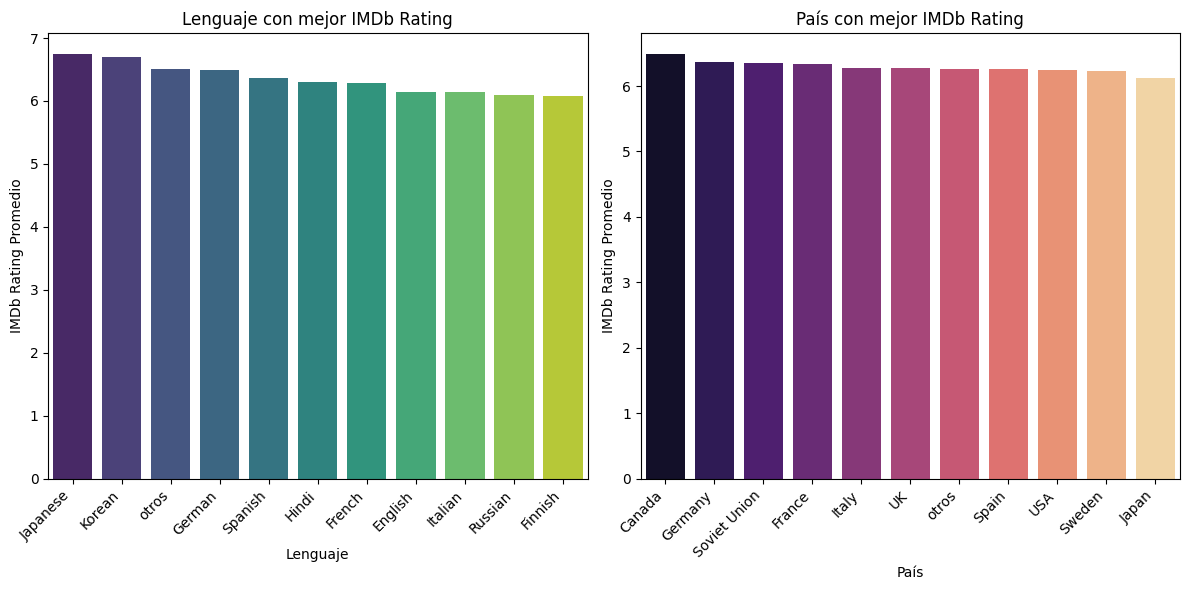

In [38]:
language_rating = df.groupby('language')['imdbRating'].mean().reset_index()
language_rating = language_rating.sort_values('imdbRating', ascending=False)
country_rating = df.groupby('country')['imdbRating'].mean().reset_index()
country_rating = country_rating.sort_values('imdbRating', ascending=False)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='language', y='imdbRating', data=language_rating, palette='viridis')
plt.title('Lenguaje con mejor IMDb Rating')
plt.xlabel('Lenguaje')
plt.ylabel('IMDb Rating Promedio')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.barplot(x='country', y='imdbRating', data=country_rating, palette='magma')
plt.title('País con mejor IMDb Rating')
plt.xlabel('País')
plt.ylabel('IMDb Rating Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


El lenguaje más votado es el "Japones" por lo cuál se tendría que concluir que el país mejor votado es Japón y si lo análizamos al revés, el país más votado es Canada, por lo cuál el idioma más votado debería ser "Inglés" o "Francés". Podemos determinar que no hay una correlación entre el país y el lenguaje en cuanto a ranking de votos.

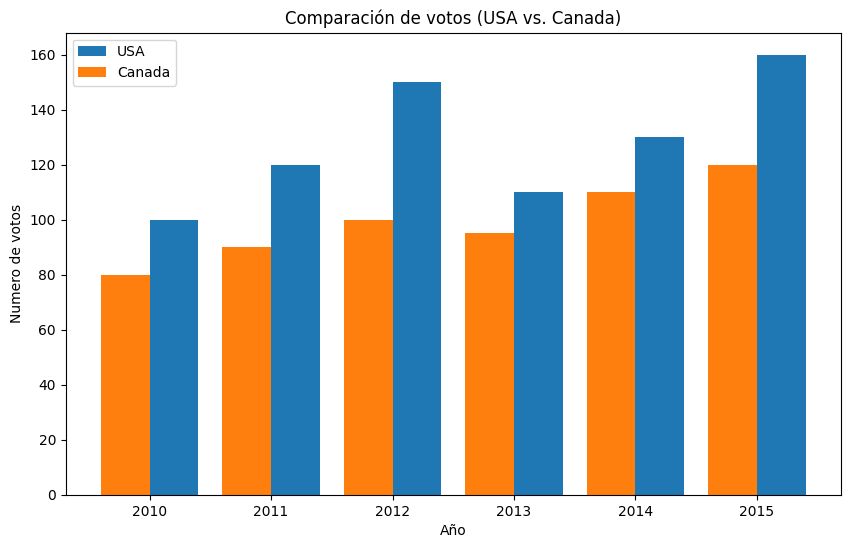

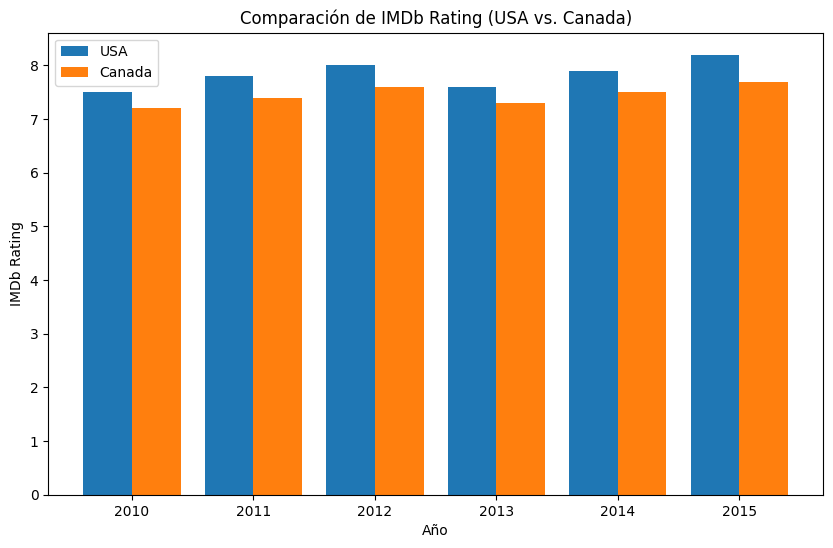

In [51]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
usa_votes = [100, 120, 150, 110, 130, 160]
canada_votes = [80, 90, 100, 95, 110, 120]
usa_imdb = [7.5, 7.8, 8.0, 7.6, 7.9, 8.2]
canada_imdb = [7.2, 7.4, 7.6, 7.3, 7.5, 7.7]

plt.figure(figsize=(10, 6))
plt.bar(years, usa_votes, label='USA', width=0.4, align='edge')
plt.bar(years, canada_votes, label='Canada', width=-0.4, align='edge')
plt.xlabel('Año')
plt.ylabel('Numero de votos')
plt.title('Comparación de votos (USA vs. Canada)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(years))
plt.bar(X_axis - 0.2, usa_imdb, 0.4, label = 'USA')
plt.bar(X_axis + 0.2, canada_imdb, 0.4, label = 'Canada')

plt.xticks(X_axis, years)
plt.xlabel("Año")
plt.ylabel("IMDb Rating")
plt.title("Comparación de IMDb Rating (USA vs. Canada)")
plt.legend()
plt.show()


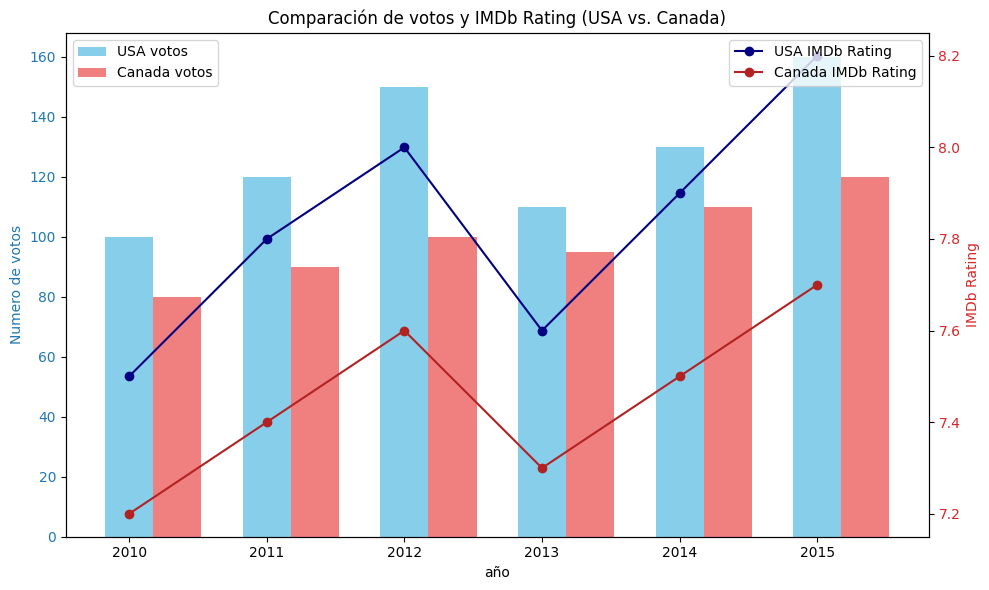

In [52]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
usa_votes = [100, 120, 150, 110, 130, 160]
canada_votes = [80, 90, 100, 95, 110, 120]
usa_imdb = [7.5, 7.8, 8.0, 7.6, 7.9, 8.2]
canada_imdb = [7.2, 7.4, 7.6, 7.3, 7.5, 7.7]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(years, usa_votes, label='USA votos', color='skyblue', width=0.35, align='center')
ax1.bar([year + 0.35 for year in years], canada_votes, label='Canada votos', color='lightcoral', width=0.35, align='center')
ax1.set_xlabel('año')
ax1.set_ylabel('Numero de votos', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(years, usa_imdb, label='USA IMDb Rating', color='navy', marker='o')
ax2.plot(years, canada_imdb, label='Canada IMDb Rating', color='firebrick', marker='o')
ax2.set_ylabel('IMDb Rating', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')
plt.title('Comparación de votos y IMDb Rating (USA vs. Canada)')
plt.xticks(years)
plt.tight_layout()
plt.show()


Podemos concluir que si bien el país con mejor Imbdrating es Canada, USA tiene muchisimos mas votos, por lo cuál, al contar con mas votos, puede variar mucho mas la media. Si bien es baja la diferencia, no podemos concluir del todo que no se encuentre sesgado el resultado de canada, ya que al tener menos votos es mas sensillo que la media no este influenciada.

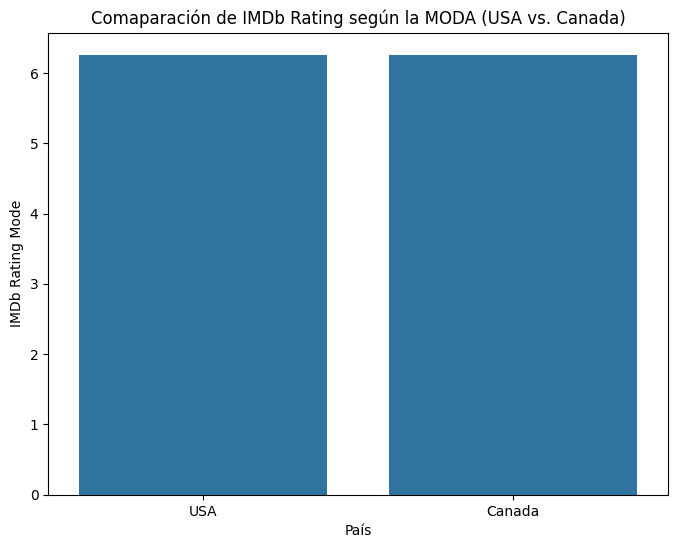

Mode for USA: 6.259067101492242
Mode for Canada: 6.259067101492242


In [53]:
usa_data = df[df['country'] == 'USA']['imdbRating']
canada_data = df[df['country'] == 'Canada']['imdbRating']
usa_mode = usa_data.mode()[0] if not usa_data.mode().empty else "No mode found"
canada_mode = canada_data.mode()[0] if not canada_data.mode().empty else "No mode found"
plt.figure(figsize=(8, 6))
sns.barplot(x=['USA', 'Canada'], y=[usa_mode, canada_mode])
plt.xlabel("País")
plt.ylabel("IMDb Rating Mode")
plt.title("Comaparación de IMDb Rating según la MODA (USA vs. Canada)")
plt.show()

print(f"Mode for USA: {usa_mode}")
print(f"Mode for Canada: {canada_mode}")


La moda (valor que más se repite) es prácticamente igual en ambas variables, por lo cuál sería mas objetivo medir según la moda y no la media.